# Generating audio dataset from existing Huggingface dataset

## Download and import dependencies

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
!pip install -r requirements.txt

  Using cached numpy-1.26.4-cp310-cp310-macosx_11_0_arm64.whl.metadata (61 kB)
  Using cached librosa-0.10.2-py3-none-any.whl.metadata (8.6 kB)
Using cached numpy-1.26.4-cp310-cp310-macosx_11_0_arm64.whl (14.0 MB)
Using cached librosa-0.10.2-py3-none-any.whl (260 kB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.0
    Uninstalling numpy-1.22.0:
      Successfully uninstalled numpy-1.22.0
  Attempting uninstall: librosa
    Found existing installation: librosa 0.10.0
    Uninstalling librosa-0.10.0:
      Successfully uninstalled librosa-0.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tts 0.22.0 requires numpy==1.22.0; python_version <= "3.10", but you have numpy 1.26.4 which is incompatible.


In [69]:
#install Tts
#!pip install data
#!pip install tts


In [8]:
#import dataset_prep
import preprocessing.preprocess
import pandas as pd

## Download and prepare text dataset

In [71]:
raw_text_dataset = preprocessing.preprocess.load_data_from_dataset("ucberkeley-dlab/measuring-hate-speech")


In [72]:
print(raw_text_dataset['train'][0:5])

{'comment_id': [47777, 39773, 47101, 43625, 12538], 'annotator_id': [10873, 2790, 3379, 7365, 488], 'platform': [3, 2, 3, 3, 0], 'sentiment': [0.0, 0.0, 4.0, 2.0, 4.0], 'respect': [0.0, 0.0, 4.0, 3.0, 4.0], 'insult': [0.0, 0.0, 4.0, 2.0, 4.0], 'humiliate': [0.0, 0.0, 4.0, 1.0, 4.0], 'status': [2.0, 2.0, 4.0, 2.0, 4.0], 'dehumanize': [0.0, 0.0, 4.0, 0.0, 4.0], 'violence': [0.0, 0.0, 0.0, 0.0, 4.0], 'genocide': [0.0, 0.0, 0.0, 0.0, 1.0], 'attack_defend': [0.0, 2.0, 4.0, 3.0, 3.0], 'hatespeech': [0.0, 0.0, 2.0, 0.0, 2.0], 'hate_speech_score': [-3.9, -6.52, 0.36, 0.26, 1.54], 'text': ['Yes indeed. She sort of reminds me of the elder lady that played the part in the movie "Titanic" who was telling her story!!! And I wouldn\'t have wanted to cover who I really am!! I would be proud!!!! WE should be proud of our race no matter what it is!!', 'The trans women reading this tweet right now is beautiful', "Question: These 4 broads who criticize America, what country did they flee to get here? And

A sample's most important keys are 'text' and 'hatespeech'.
Here, one sample is shown:

In [73]:
df = pd.DataFrame.from_dict(raw_text_dataset['train'])

print(df)

        comment_id  annotator_id  platform  sentiment  respect  insult  \
0            47777         10873         3        0.0      0.0     0.0   
1            39773          2790         2        0.0      0.0     0.0   
2            47101          3379         3        4.0      4.0     4.0   
3            43625          7365         3        2.0      3.0     2.0   
4            12538           488         0        4.0      4.0     4.0   
...            ...           ...       ...        ...      ...     ...   
135551       37080          8590         2        1.0      1.0     0.0   
135552       22986          8303         2        2.0      0.0     0.0   
135553       21008          6207         2        1.0      1.0     1.0   
135554       22986          7886         2        2.0      0.0     0.0   
135555       14785          6897         0        4.0      4.0     4.0   

        humiliate  status  dehumanize  violence  ...  \
0             0.0     2.0         0.0       0.0  ...   

In [74]:
#save the raw text dataset to a csv file
df.to_csv("data/text/data_raw.csv", index=False)

In [9]:
#load the csv file
df = pd.read_csv("data/text/data_raw.csv")

In [10]:
#display stats of raw text dataset
num_rows = df.shape[0]
print(f"The dataset has {num_rows} rows.")


The dataset has 39565 rows.


In [76]:
print(df['hate_speech_score'].describe())

#print first three texts with the highest hate speech score
print(df['text'][0])
print(df['text'][1])
print(df['text'][2])



count    135556.000000
mean         -0.567428
std           2.380003
min          -8.340000
25%          -2.330000
50%          -0.340000
75%           1.410000
max           6.300000
Name: hate_speech_score, dtype: float64
Yes indeed. She sort of reminds me of the elder lady that played the part in the movie "Titanic" who was telling her story!!! And I wouldn't have wanted to cover who I really am!! I would be proud!!!! WE should be proud of our race no matter what it is!!
The trans women reading this tweet right now is beautiful
Question: These 4 broads who criticize America, what country did they flee to get here? And now they want to make OUR America like THEIR former HELL HOLE. I don't think so!!!!!!!!!!  Let them explain their GRATITUDE for letting them in OUR country.


In [77]:

# Assuming raw_text_dataset is a dictionary-like object with columns like 'text' and 'hate_speech_score'
data = {
    'id': df['comment_id'],
    'text': df['text'],
    'hate_speech_score': df['hate_speech_score']
}

# count how many tuples exist with different text 
comment_ids = data['id']
comment_ids = set(comment_ids)
num_comments = len(comment_ids)
print(f"The dataset has {num_comments} unique comments.")

data_original = pd.DataFrame(data)
data_original.describe()

The dataset has 39565 unique comments.


,id,hate_speech_score
count,135556.000000,135556.000000
mean,23530.416138,-0.567428
std,12387.194125,2.380003
min,1.000000,-8.340000
25%,18148.000000,-2.330000
50%,20052.000000,-0.340000
75%,32038.250000,1.410000
max,50070.000000,6.300000


***The structure original of the dataset is the following:***



hate_speech_score - continuous hate speech measure, where higher = more hateful and lower = less hateful. > 0.5 is approximately hate speech, < -1 is counter or supportive speech, and -1 to +0.5 is neutral or ambiguous.

The hatespeech score is the calculated as the follwing and is unique to the id of the annotation but not the the annotator the annotation was made by.
IRT adjustment by estimating variation in annotator interpretation of the labeling guidelines.

In [78]:
# Drop duplicates based on the 'comment_id' column
data_unique_comment_id = df.drop_duplicates(subset=['comment_id'])

# Reset the index of the DataFrame
data_unique_comment_id.reset_index(drop=True, inplace=True)

# Assuming raw_text_dataset is a dictionary-like object with columns like 'text' and 'hate_speech_score'
data = {
    'id': data_unique_comment_id['comment_id'],
    'text': data_unique_comment_id['text'],
    'hate_speech_score': data_unique_comment_id['hate_speech_score']
}

# count how many tuples exist with different text 
data_df = pd.DataFrame(data)
data_df.describe()

,id,hate_speech_score
count,39565.000000,39565.000000
mean,25064.175028,-0.943911
std,14573.790336,2.073087
min,1.000000,-8.340000
25%,12336.000000,-2.330000
50%,24986.000000,-0.700000
75%,37837.000000,0.570000
max,50070.000000,6.300000


In [20]:
#load the csv file  
data_df = pd.read_csv("data/text/data.csv")

#remove id and make the first row as id
data_df = data_df.drop(columns=['id'])


 

In [21]:
data_df.head()

,text,hate_speech_score,hate_speech_label
0,Yes indeed. She sort of reminds me of the elde...,-3.90,supportive
1,The trans women reading this tweet right now i...,-6.52,supportive
2,Question: These 4 broads who criticize America...,0.36,neutral
3,It is about time for all illegals to go back t...,0.26,neutral
4,For starters bend over the one in pink and kic...,1.54,hate


In [22]:
# enumerate the id from zero to n and make it the index
data_df['id'] = range(0, len(data_df))
data_df.set_index('id', inplace=True)

# convert the hate speech score to hate speech label
hate_speech_labels = ['supportive', 'neutral', 'hate']

# change hate speech score to hate speech label
data_df['hate_speech_label'] = pd.cut(data_df['hate_speech_score'], bins=[-10, -0.01, 0.49, 10], labels=hate_speech_labels)
# Save the preprocessed data to a CSV file
data_df.to_csv('data/text/data.csv')

#print first 40 rows of the data
data_df.head(40)



,text,hate_speech_score,hate_speech_label
id,,,
0,Yes indeed. She sort of reminds me of the elde...,-3.90,supportive
1,The trans women reading this tweet right now i...,-6.52,supportive
2,Question: These 4 broads who criticize America...,0.36,neutral
3,It is about time for all illegals to go back t...,0.26,neutral
4,For starters bend over the one in pink and kic...,1.54,hate
5,Sounds like the kinda wholsesome life I'd die ...,-4.93,supportive
6,Who the fuck is this insignificant simple mind...,0.17,neutral
7,Fuck off you insufferable retarded faggot.,2.08,hate
8,"OMG! The EGO's of these young, young, inexperi...",-0.66,supportive


## Analyzing the extracted data

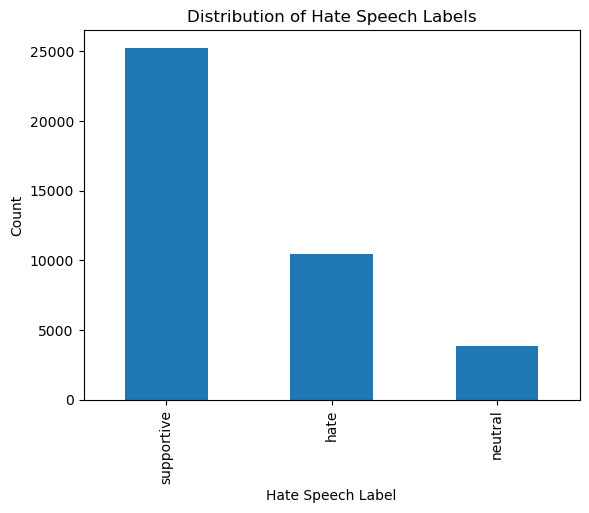

In [23]:
# plot the distribution of the hate speech labels
import matplotlib.pyplot as plt

data_df['hate_speech_label'].value_counts().plot(kind='bar')
plt.xlabel('Hate Speech Label')
plt.ylabel('Count')
plt.title('Distribution of Hate Speech Labels')
plt.show()

In [24]:
count_hate = data_df['hate_speech_label'].value_counts()['hate']
count_neutral = data_df['hate_speech_label'].value_counts()['neutral']
count_supportive = data_df['hate_speech_label'].value_counts()['supportive']

print(f"Number of supportive comments: {count_supportive}")
print(f"Number of neutral comments: {count_neutral}")
print(f"Number of hate comments: {count_hate}")

Number of supportive comments: 25255
Number of neutral comments: 3873
Number of hate comments: 10437


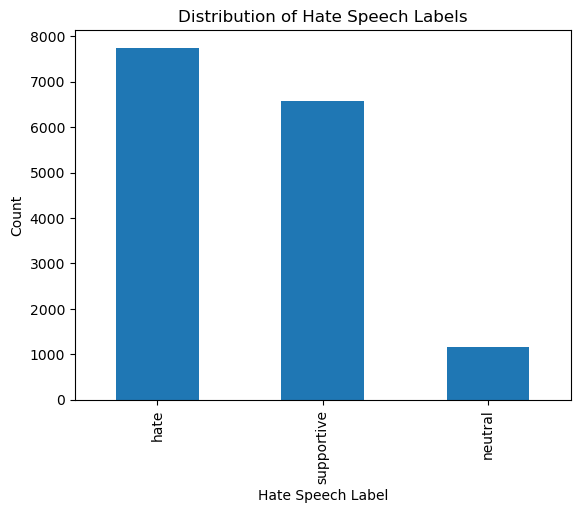

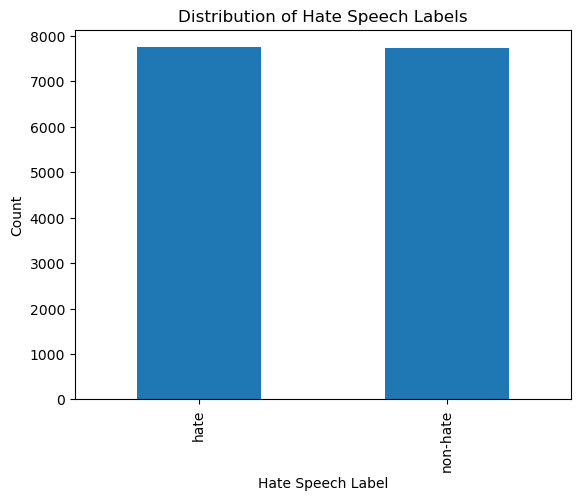

In [25]:
# Calculate the minimum count among neutral and supportive labels
min_count = min(count_neutral, count_supportive)

# Group the data by 'hate_speech_label' and sample 'min_count' samples for each group
balanced_neutral = data_df[data_df['hate_speech_label'] == 'neutral'].sample(n=int(min_count*0.3), random_state=42)
balanced_supportive = data_df[data_df['hate_speech_label'] == 'supportive'].sample(n=int(min_count*1.7), random_state=42)
balanced_hate = data_df[data_df['hate_speech_label'] == 'hate'].sample(n=min_count*2, random_state=42)

# Concatenate the balanced samples to create the balanced dataset
data_balanced = pd.concat([balanced_neutral, balanced_supportive, balanced_hate], ignore_index=True)

# Shuffle the dataset
data_balanced = data_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# print distribution of hate speech labels
data_balanced['hate_speech_label'].value_counts().plot(kind='bar')
plt.xlabel('Hate Speech Label')
plt.ylabel('Count')
plt.title('Distribution of Hate Speech Labels')
plt.show()

# Change label of neutral and supportive to non-hate
data_balanced['hate_speech_label'] = data_balanced['hate_speech_label'].replace(['neutral', 'supportive'], 'non-hate')

# plot new distribution of hate speech labels
data_balanced['hate_speech_label'].value_counts().plot(kind='bar')
plt.xlabel('Hate Speech Label')
plt.ylabel('Count')
plt.title('Distribution of Hate Speech Labels')
plt.show()

# Save the balanced data to a CSV file
data_balanced.to_csv('data/text/data_balanced.csv')



### Plot the distribution of the hate speech score

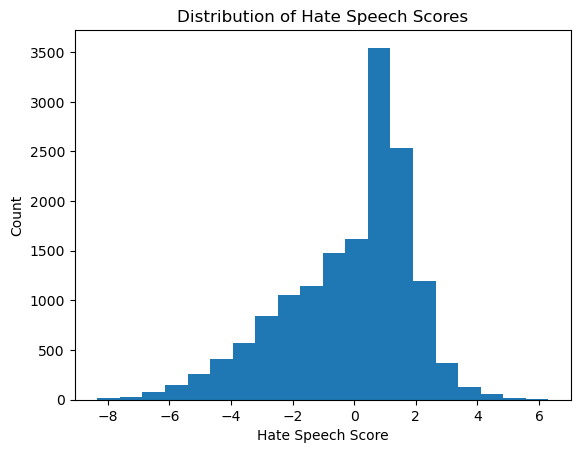

In [26]:
# plot the distribution of the hate speech score in the balanced dataset
data_balanced['hate_speech_score'].plot(kind='hist', bins=20)
plt.xlabel('Hate Speech Score')
plt.ylabel('Count')
plt.title('Distribution of Hate Speech Scores')
plt.show()


In [85]:
# save the balanced data to a csv file
data_balanced.to_csv('data/text/data_balanced.csv')

# Preprocess the text data
**remove the special characters and convert the text to lowercase**

Ideas how to pre-process the text data and generate the audio data:

### filtering task 
- filter phrases with parathesis from the text
- filter text with emojis, special characters, emails, urls, aphosotrophes, but keep stopwords for the synthetisizer to sound more natural
- filter out phrases with more than 40 words

### Cleaning task 
- remove word after an @ in the text or # in the text
- convert the abbreviations to full words
- Spell checking needed and remove the spelling mistakes
- remove all not english words from the text
- remove the - and the







In [86]:
# load data from csv file 
#data_balanced = pd.read_csv('data/text/data_balanced.csv')


In [87]:
preprocessed = preprocessing.preprocess.remove_special_tokens(data_balanced)

preprocessed = preprocessing.preprocess.replace_abbreviations_and_slang(preprocessed)

preprocessed = preprocessing.preprocess.remove_non_english(preprocessed)

In [88]:
preprocessed.head()

,text,hate_speech_score,hate_speech_label
0,democrats using african americans again,-1.18,non-hate
1,i lived in johannesburg when i was a kid and s...,-5.35,non-hate
2,fuck your so hot,-5.62,non-hate
3,that's enough sour grapes projection and white...,-1.61,non-hate
4,they made aladdin black .. leftist racist cucks,0.58,hate


In [89]:
# Save the balanced data to a json file 
with open('data/text/preprocessed.json', 'w') as f:
    f.write(preprocessed.to_json(orient='records', lines=True))

# Save the balanced data to a csv file
preprocessed.to_csv('data/text/preprocessed.csv')

In [90]:
preprocessed.head(100)

,text,hate_speech_score,hate_speech_label
0,democrats using african americans again,-1.18,non-hate
1,i lived in johannesburg when i was a kid and s...,-5.35,non-hate
2,fuck your so hot,-5.62,non-hate
3,that's enough sour grapes projection and white...,-1.61,non-hate
4,they made aladdin black .. leftist racist cucks,0.58,hate
...,...,...,...
95,mika hart know any white bois named dewayne?!,-2.70,non-hate
96,i'll get my revenge when i fuck on your nigga ...,1.35,hate
97,i'd be in jail for murder. the nigga spitting ...,2.56,hate
98,africa don't even want the blacks back,1.08,hate


### Padding 

# Upload the datasets to the Hugginface

In [95]:
#login to huggingface

from huggingface_hub import notebook_login

notebook_login()

In [ ]:
import data.upload_dataset_to_hf

#push dataset to hugginface 
data.upload_dataset_to_hf.upload_dataset_to_huggingface()

Casting to class labels:   0%|          | 0/1240 [00:00<?, ? examples/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/992 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/10 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/248 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

README.md:   0%|          | 0.00/673 [00:00<?, ?B/s]